# Code Breaking Part 2: Random Substitution Ciphers



These are more general versions of the Ceaser Shift Cipher where each letter in the plain text alphabet gets mapped to a letter in the cipher alphabet. 

Unlike the Ceaser Shift Cipher, the cipher alphabet may not retain any of the original letter ordering of the plain alphabet.  

In this case, it is possible that a letter in the plain text alphabet gets mapped to itself in the cipher alphabet, but this is actually okay and won't make the encryption any less secure! 

**Resources**: 
- The Code Book, http://practicalcryptography.com/cryptanalysis/stochastic-searching/cryptanalysis-simple-substitution-cipher/, 
- this video https://www.youtube.com/watch?v=LhS8N6oJdno&list=PLeOSHd3t9lzK63xz7LB9jAXwSv7TtQYvY&index=2, 
- and this video https://www.youtube.com/watch?v=pF-DzPOCeM8, and this video https://www.youtube.com/watch?v=SbZR_AE_6bk
- and this page http://practicalcryptography.com/cryptanalysis/text-characterisation/quadgrams/#a-python-implementation
- and this page http://practicalcryptography.com/cryptanalysis/stochastic-searching/cryptanalysis-simple-substitution-cipher/


## Random Substitution
Example)

Position | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10| 11| 12 |13 |14 |15 |16| 17|18 |19 |20 |21 |22 |23 |24| 25|
---| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---| ---| --- |--- |--- |--- |---| ---|--- |--- |--- |--- |--- |--- |---| ---|
Plain Alphabet| a |b | c |d | e | f | g | h | i | j | k | l | m |n |o |p |q |r |s |t |u |v |w |x |y |z |
Cipher Alphabet| Z | X | W |K | Y | L | D | J | M | I | B | R | N |F |G |T |A |Q |P |C |E |S |H |O |U |V |



## Keyword Substitution

Example)  Keyword: *ZEBRA* at position 0 

Position | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10| 11| 12 |13 |14 |15 |16| 17|18 |19 |20 |21 |22 |23 |24| 25|
---| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---| ---| --- |--- |--- |--- |---| ---|--- |--- |--- |--- |--- |--- |---| ---|
Plain Alphabet| a |b | c |d | e | f | g | h | i | j | k | l | m |n |o |p |q |r |s |t |u |v |w |x |y |z |
Cipher Alphabet| **Z** | **E** | **B** |**R** | **A** | C | D | F | G | H | I | J | K |L |M |N |O |P |Q |S |T |U |V |W |X |Y |








In [1]:
from Resources.Functions import *

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import log10
import pandas as pd
import random

In [5]:
plainAlphabet = list('abcdefghijklmnopqrstuvwxyz')

In [147]:
def prepareText(text):
    '''
    This is a function to prepare a cipher text, 
    written in alphabetic characters, for analysis. 
    
    It does this by:
    1) removing all punctuation, whitespace, and nonalphabetic characters
    2) changing all alphabetic characters to upper case
    '''
    
    preparedText = ''
    for item in list(text):
        if item.isalpha():
            preparedText = preparedText + item.upper()
    return preparedText

## Step 1) Encrypt the message

This follows the same logical steps as in Part 1 The Ceaser's Cipher.  The ony difference is the encryption method


In [160]:
def Incrypt_KeywordSubCipher(plainText, plainAlphabet, keyword, placement):

    cipherAlphabet = [0]*len(plainAlphabet)
    remainingAlphabet = [i for i in plainAlphabet if i not in keyword]

    # Place the end of the remaining alphabet at the begining of the cipher alphabet
    for i in range(placement):
        cipherAlphabet[i] = remainingAlphabet[ len(plainAlphabet) - (placement+len(keyword)): ][i]

    # Place the keyword
    for j in range(len(keyword)):
        cipherAlphabet[placement+j] = keyword[j]  

    # Fill the rest of the spots after the keyword with the reamaining alphabet
    for k in range(len(plainAlphabet) - (placement+len(keyword))  ):
        cipherAlphabet[placement+len(keyword)+k] = remainingAlphabet[k] 
        
    print(cipherAlphabet)
    
    key = {}
    for i in range(len(plainAlphabet)):
        key[plainAlphabet[i].upper()] = cipherAlphabet[i].upper()
        
    cipherText = ''

    for plainCharacter in plainText:

        # We will translate all letters from the plain alphabet into the cipher alphabet
        if plainCharacter.isalpha():  
            cipherCharacter = key[plainCharacter]
            cipherText = cipherText + cipherCharacter

        # All other characters will just be copied over
        else:
            cipherText = cipherText + plainCharacter
    
    return cipherText


def Incrypt_RandomSubCipher(plainText, plainAlphabet):

    cipherAlphabet = plainAlphabet.copy()
    random.shuffle(cipherAlphabet)
    
    key = {}
    for i in range(len(plainAlphabet)):
        key[plainAlphabet[i].upper()] = cipherAlphabet[i].upper()
        
    cipherText = ''

    for plainCharacter in plainText:

        # We will translate all letters from the plain alphabet into the cipher alphabet
        if plainCharacter.isalpha():  
            cipherCharacter = key[plainCharacter]
            cipherText = cipherText + cipherCharacter

        # All other characters will just be copied over
        else:
            cipherText = cipherText + plainCharacter
    
    return cipherText, cipherAlphabet

In [254]:
Incrypt_KeywordSubCipher(('TONIGHT I STEAL THE HOT ROCK. THEY SUSPECT NOTHING.'), plainAlphabet, 'meow', 0)

['m', 'e', 'o', 'w', 'a', 'b', 'c', 'd', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'n', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'z']


'SLKFCDS F RSAMI SDA DLS QLOH. SDAY RTRNAOS KLSDFKC.'

In [190]:
Incrypt_RandomSubCipher(prepareText('Food Supplies are Low. Revolt!'), plainAlphabet)

('FQQNBJLLUPSBZESUQKESHQUW',
 ['z',
  'a',
  'i',
  'n',
  's',
  'f',
  'x',
  'r',
  'p',
  'o',
  'd',
  'u',
  'g',
  'c',
  'q',
  'l',
  'm',
  'e',
  'b',
  'w',
  'j',
  'h',
  'k',
  'y',
  'v',
  't'])

## Step 2) De-encrypt the cipher text

Here we will assume that we know the key and encryption method.
We essentially repeat the steps of encrypting the text but in reverse

In [161]:
def Decrypt_KeywordSubCipher(cipherText, plainAlphabet, keyword, placement):

    cipherAlphabet = [0]*len(plainAlphabet)
    remainingAlphabet = [i for i in plainAlphabet if i not in keyword]

    # Place the end of the remaining alphabet at the begining of the cipher alphabet
    for i in range(placement):
        cipherAlphabet[i] = remainingAlphabet[ len(plainAlphabet) - (placement+len(keyword)): ][i]

    # Place the keyword
    for j in range(len(keyword)):
        cipherAlphabet[placement+j] = keyword[j]  

    # Fill the rest of the spots after the keyword with the reamaining alphabet
    for k in range(len(plainAlphabet) - (placement+len(keyword))  ):
        cipherAlphabet[placement+len(keyword)+k] = remainingAlphabet[k] 
    
    key = {}
    for i in range(len(plainAlphabet)):
        key[cipherAlphabet[i].upper()] = plainAlphabet[i].upper()
        
    plainText = ''

    for cipherCharacter in cipherText:

        # We will translate all letters from the plain alphabet into the cipher alphabet
        if cipherCharacter.isalpha():  
            plainCharacter = key[cipherCharacter]
            plainText = plainText + plainCharacter

        # All other characters will just be copied over
        else:
            plainText = plainText + cipherCharacter
    
    return plainText


def Decrypt_RandomSubCipher(cipherText, plainAlphabet, cipherAlphabet):

    
    key = {}
    for i in range(len(plainAlphabet)):
        key[cipherAlphabet[i].upper()] = plainAlphabet[i].upper()
        
    plainText = ''

    for cipherCharacter in cipherText:

        # We will translate all letters from the plain alphabet into the cipher alphabet
        if cipherCharacter.isalpha():  
            plainCharacter = key[cipherCharacter.upper()]
            plainText = plainText + plainCharacter

        # All other characters will just be copied over
        else:
            plainText = plainText + cipherCharacter
    
    return plainText

## Step 3)  Let's try to break the encryption (pretend we do not know the shift/key)

When we broke the Ceaser Shift Cipher we were able to test every possible key in a sort of brute force method (there are only 25 ways to shift the alphabet and we checked them all). 

Now letters can be placed in any order, making 26! possible keys.  This is wayyy too many to test via brute force, so we are going to need smarter approach.  This is where the Hill Climbing Algorithm comes in.

We will still use the principles of frequency analysis from the Ceaser Cipher, but we will need to be a bit more rigorous in our functions first. In praticular we need a more rigorous definition of "fitness" (what was previously called the similarity score).  A higher fitness value of a given text indicates that the text is more likely to be in the given language


The following is based on: http://practicalcryptography.com/cryptanalysis/text-characterisation/quadgrams/

In [156]:
def quadgramFitness(Text,quadgramsFreq):
    '''
    Get the quadgram fitness for a text based on the given guadgram frequencies
    '''   
    totalQuadgrams = sum(quadgramsFreq.values())

    # For each quadgram in the cipherText, get the probablity of that quadgram occuring 
    fitness = 0 # The measure of how close the text is to english 
    for index in range(len(Text) - 3 ):
        if Text[index:index+4] in quadgramsFreq.keys(): 
            probability = quadgramsFreq[Text[index:index+4]] / totalQuadgrams
            logProb = log10(probability)
            fitness = fitness + logProb
        else: 
            probability =  0.1 / totalQuadgrams
            logProb = log10(probability)
            fitness = fitness + logProb

    return fitness

### Hill Climbing Algorithm

We need to test different keys to see if they correclty decipher the message.  However, we can no longer try every possible combination.  

Hill Climbing Algorithm:
1. Create a random key (ie a random ordering of the alphabet), this will be called the parent. Decipher the cipherText with this key. Find the fitness (or score) of this deciphered text
2. Change the key slighlty by swapping two characters in the key at random, this is called the child key.  Decipher the cipherText with this key and find the score. 
3. If the score increases with the modification, then set the parent key equal to the child key then repeat the steps
4. Or else try another swap in the parentkey

The amount of "swaps" tried before abandinign the attempt is set arbitrarily 

The Hill climbing alogorithm will need to be run for different random starting keys to prevent the code from converging on a local maximum and not the true solution. Also it is possible to find a "solution" that has more english-like quadgram frequency but is not the real plain text

In [256]:
def break_randomSubstitution( cipherText, plainAlphabet, quadgramFrequencies):
    
    maxAlphabet = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    maxScore = -99e9
    parentScore, parentAlphabet = maxScore,maxAlphabet[:]
 
    # Each 'realization' is a different random starting alphabet
    for realization in range(5):
        
        # Randomly shuffle the alphabet
        random.shuffle(parentAlphabet)
  
        #Decipher the ciperText using the parent alphabet
        parentDeciphered = Decrypt_KeywordSubCipher(cipherText, plainAlphabet, parentAlphabet)
        
        # Get score of the parent-deciphered text
        parentScore = quadgramFitness(parentDeciphered,quadgramsFreq)
        
        count = 0
        while count < 2000:
            
            a = random.randint(0,len(plainAlphabet)-1)
            b = random.randint(0,len(plainAlphabet)-1)
            childAlphabet = parentAlphabet[:]
            # swap two characters in the child
            temp = childAlphabet.copy()
            childAlphabet[a] = temp[b] 
            childAlphabet[b] = temp[a]
            
            #Decipher the ciperText using the child alphabet
            childDeciphered = Decrypt_KeywordSubCipher(cipherText, plainAlphabet, childAlphabet)
            
            # Get score of the child-deciphered text
            childScore = quadgramFitness(childDeciphered,quadgramsFreq)
            
            if childScore > parentScore:
                # The child becomes the next parent
                parentScore = childScore
                parentAlphabet = childAlphabet[:]
                count = 0
            
            count = count + 1
            
        if parentScore > maxScore:
            print('\n------------ Iterarion {}'.format(realization))
            print('Score: {}'.format(parentScore))
            print('Key: {}'.format(parentAlphabet))
            print('Potential plain text:\n{}'.format(Decrypt_KeywordSubCipher(cipherText, plainAlphabet, parentAlphabet)))
            print('------------\n')
            maxScore = parentScore
            maxAlphabet = parentAlphabet
    

In [207]:
 # Read the quadgram frequencies
quadgramsFreq = {}
quadgramsText = open('english_quadgrams.txt')
quadgramsTextLines = quadgramsText.readlines()

for quadgram in quadgramsTextLines:
    TextLine = quadgram.split(' ')
    quadgramsFreq[TextLine[0]] = int(TextLine[1][:-1]) # Lines end in \n character and we need to remove that

totalQuadgrams = sum(quadgramsFreq.values())
    
quadgramsText.close()


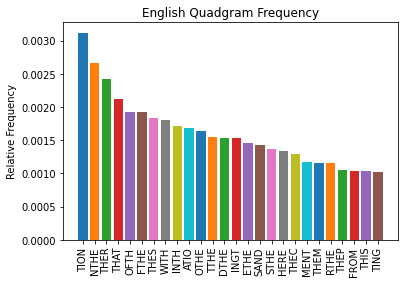

In [216]:
quads = ['TION', 'NTHE', 'THER', 'THAT', 'OFTH', 'FTHE', 'THES', 'WITH', 'INTH', 'ATIO', 'OTHE', 'TTHE', 'DTHE', 'INGT', 'ETHE', 'SAND', 'STHE', 'HERE', 'THEC', 'MENT', 'THEM', 'RTHE', 'THEP', 'FROM', 'THIS', 'TING']

# fig = plt.figure(figsize=(10, 8), dpi=120, facecolor='w', edgecolor='k')
for i,key in enumerate(quads):
    bar = plt.bar(i,quadgramsFreq[key]/totalQuadgrams)

xticks = plt.xticks(np.arange(len(quads)), quads)
ylabel = plt.ylabel('Relative Frequency')
plt.xticks(rotation=90)

title = plt.title('English Quadgram Frequency')

In [174]:
cipherText = open('TheCipherTexts_CipherChallenge/Stage2.txt').read()
cipherText

'MHILY LZA ZBHL XBPZXBL MVYABUHL HWWPBZ JSHBKPBZ JHLJBZ\n\nKPJABT HYJHUBT LZA ULBAYVU'

## 3.2) Breaking a keyword substitution with a crib 

A `crib` is a word we think will likley be in the cipher text 

We can incrypt the crib using words from a dictionary and then check to see if each incrypted crib appears in the cipher text 

If we do see the incrypted-crib appear in the cipher text then we can try to decrypt the entire cipher text using the corresponding keyword 

Common words such as "the", "he", "she", "their" etc are all likley to appear in an english text 
But if we think that a certain specific word will appear in the text like expecting to see "weather" "sunny" or "rain" in a message from a weather statation we can try that as the crib

In [129]:
def Break_KeyWordSubDictAttack(cipherText,dictionary=open('Resources/SampleTexts/englishWords3.txt').readlines(), plainAlphabet=englishAlphabet,knownLetterFrequencies=letterFrequencies_English):
    '''
    Break a keyword substitution cipher with a dictionary attack using 
    Chi-Squared statistics 
    - A "key" for this type of encryption consists of a keyword and a position
       - keywords are taken from the dictionary 
    '''
    
    # How many keys to try without an improvement before giving up
    # Here I am setting the tolerance to be ~half the number of possiblle keys
    tolerance = 0.5*(len(dictionary)*(26-np.mean([len([i for i in line if i.isalpha()]) for line in dictionary])))
    
    bestKeyword = []
    bestPosition = -1
    bestScore = 99e9
    
    # How many keys have been tried since the last improvement
    cnt = 0
    
    # Try words from the dictionary as the keyword 
    for keyword in dictionary:
        keyword = ''.join([i for i in keyword if i.isalpha()])
        
        # Try each possible placement of the keyword
        for position in range(0,len(plainAlphabet)-len(keyword)+1):
            decryptTest = Decrypt_KeywordSubCipher(cipherText, keyword, position, plainAlphabet=englishAlphabet)
            score = ChiSquaredStatistic(decryptTest, knownLetterFrequencies)
            
            if score < bestScore:
                cnt = 0
                bestKeyword = keyword
                bestPosition = position
                bestScore = score
                
                print(bestKeyword)
            cnt += 1
            if cnt >= tolerance:
                    return bestKeyword,bestPosition, Decrypt_KeywordSubCipher(cipherText, bestKeyword, bestPosition, plainAlphabet=englishAlphabet)
    


In [131]:
Break_KeyWordSubDictAttack(Incrypt_KeywordSubCipher(text, 'abc', 10))

a
a
a
a
acedia
ae
aecidia


('aecidia',
 10,
 'ITWANADASKAODNTLSMYOIGHTESWIOHUDDPEDUODESHINCLVESNANHEHADDLOEOUMESLUNTIMENTHATNUMMESANTHEWIODAODSAIOPANHEDATTHEWIODLWHEFEASEDHAVIOGTLSETSEATTLTHENTLSM')

In [302]:
def Break_KeyWordSubDictAttackwCrib(cipherText,cribs,dictionary=open('Resources/SampleTexts/englishWords3.txt').readlines(), plainAlphabet=englishAlphabet,knownLetterFrequencies=letterFrequencies_English):
    '''
    Break a keyword substitution cipher with a dictionary attack using cribs
   
   - A "key" for this type of encryption consists of a keyword and a position
       - keywords are taken from the dictionary 
       
    - 'cribs' is a list of cribs to search for.  
        - Please try to be certain that the message actually contains the cribs
        - It is best to use as many cribs as you can
    - 
    '''
    
    cribs = [''.join([ c.upper() for c in i if c.isalpha()]) for i in cribs]
    
    bestKeyword = ''
    bestPosition = -1
    bestScore = 0
 
    # Try words from the dictionary as the keyword 
    for keyword in dictionary:
        keyword = ''.join([i.upper() for i in keyword if i.isalpha()])   
        # Try each possible placement of the keyword
        for position in range(0,len(plainAlphabet)-len(keyword)+1):
            
            score = 0
            for crib in cribs:
#                 print(crib)
                incryptedCrib = Incrypt_KeywordSubCipher(crib, keyword, position, plainAlphabet=englishAlphabet)
#                 print(Incrypt_KeywordSubCipher('THE', 'CAT', 0))
                
                if cipherText.find(incryptedCrib) != -1:
                    # The crib is in the cipher text
                    score += 1
            
            if score == len(cribs):
                # All of the incrypted cribs were found in the cipher text
                return keyword, position, Decrypt_KeywordSubCipher(cipherText, keyword, position, plainAlphabet=englishAlphabet)
            elif score > bestScore:
                bestKeyword = keyword
                bestPosition = position
    
    return bestKeyword, bestPosition, Decrypt_KeywordSubCipher(cipherText, bestKeyword, bestPosition, plainAlphabet=englishAlphabet)

In [6]:
text = prepareText(open('Resources/SampleTexts/QuantumPrologue.txt').read())
cipherText = Incrypt_KeywordSubCipher(text, 'cat', 3)

open('Resources/SampleTexts/QuantumPrologue.txt').read()

'It was a dark and stormy night. Erwin huddled under his covers as he had done numerous times that\nsummer. As the wind and rain lashed at the window, he feared having to retreat to the storm cellar\nonce again. The residents of Erwin’s apartment building sought shelter whenever there were threats of\ntornadoes in the area. While it was safe down there, Erwin feared the ridicule he would face once again\nfrom the other school boys. In the rush to the cellar, Erwin seemed to always end up with a random\npair of socks, and the other boys teased him about it mercilessly.\nNot that Erwin hadn’t tried hard to solve this problem. He had a very simple collection of\nsocks—black or white, for either school or play; short or long, for either trousers or lederhosen.\nAfter the first few teasing episodes from the other boys, Erwin had sorted his socks into two separate\ndrawers. He placed all the black socks in one drawer and all the white socks in another drawer.\nErwin figured he could determin

In [306]:
Break_KeyWordSubDictAttackwCrib(cipherText,('socks','erwin','color','he', 'the', 'their', 'it','and', 'or'))

('CAT',
 3,
 'ITWASADARKANDSTORMYNIGHTERWINHUDDLEDUNDERHISCOVERSASHEHADDONENUMEROUSTIMESTHATSUMMERASTHEWINDANDRAINLASHEDATTHEWINDOWHEFEAREDHAVINGTORETREATTOTHESTORMCELLARONCEAGAINTHERESIDENTSOFERWINSAPARTMENTBUILDINGSOUGHTSHELTERWHENEVERTHEREWERETHREATSOFTORNADOESINTHEAREAWHILEITWASSAFEDOWNTHEREERWINFEAREDTHERIDICULEHEWOULDFACEONCEAGAINFROMTHEOTHERSCHOOLBOYSINTHERUSHTOTHECELLARERWINSEEMEDTOALWAYSENDUPWITHARANDOMPAIROFSOCKSANDTHEOTHERBOYSTEASEDHIMABOUTITMERCILESSLYNOTTHATERWINHADNTTRIEDHARDTOSOLVETHISPROBLEMHEHADAVERYSIMPLECOLLECTIONOFSOCKSBLACKORWHITEFOREITHERSCHOOLORPLAYSHORTORLONGFOREITHERTROUSERSORLEDERHOSENAFTERTHEFIRSTFEWTEASINGEPISODESFROMTHEOTHERBOYSERWINHADSORTEDHISSOCKSINTOTWOSEPARATEDRAWERSHEPLACEDALLTHEBLACKSOCKSINONEDRAWERANDALLTHEWHITESOCKSINANOTHERDRAWERERWINFIGUREDHECOULDDETERMINEANINDIVIDUALSOCKSLENGTHINTHEDARKOFNIGHTSIMPLYBYFEELINGITBUTHEHADTOHAVETHEMPRESORTEDINTOWHITEANDBLACKBECAUSETHEAPARTMENTGENERALLYLOSTPOWERBEFORETHECALLTOTHESHELTERUNFORTUNATELYERWINFOUNDTHATTHISP

## 3.3) Breaking a substitution with matched frequencies



In [61]:
def bestMatchedFreq(letterFreq, knownLetterFrequencies=letterFrequencies_English):
    
    # ordered highest freq to lowest
    knownLetterFrequencies = {k: v for k, v in sorted(knownLetterFrequencies.items(), key=lambda item: item[1], reverse=True)}
    letterFreq = {k: v for k, v in sorted(letterFreq.items(), key=lambda item: item[1], reverse=True)}

    bestMatches = {}
    for key, value in letterFreq.items():
        minimum = 1
        for knownKey, knownValue in knownLetterFrequencies.items():
            if abs(value - knownValue ) < minimum and knownKey not in list(bestMatches.values()):
                minimum = abs(value - knownValue )
                bestMatches[ key.upper() ] = knownKey


    
    return bestMatches
    

In [64]:
text = prepareText(open('Resources/SampleTexts/QuantumPrologue.txt').read())
cipherText = Incrypt_KeywordSubCipher(text, 'cat', 3)
# open('Resources/SampleTexts/QuantumPrologue.txt').read()

In [67]:
l = bestMatchedFreq(letterFrequencies(cipherText))
dict(sorted(l.items()))

{'A': 'e',
 'B': 'p',
 'C': 'd',
 'D': 'n',
 'E': 'h',
 'G': 'b',
 'H': 'l',
 'I': 'g',
 'J': 'r',
 'K': 'a',
 'L': 'w',
 'M': 'q',
 'N': 'o',
 'O': 'i',
 'P': 't',
 'Q': 'y',
 'R': 'j',
 'S': 'u',
 'T': 'f',
 'U': 'z',
 'V': 'k',
 'X': 's',
 'Y': 'v',
 'Z': 'c'}

In [ ]:
[  ]